In [1]:
%matplotlib ipympl
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
import matplotlib as mpl
from tqdm import tqdm

Código Fuente

In [125]:
#Creamos una función que acepte como parámetros los poteniales en las fronteras, los puntos de red N y M, y la ditancia de paso h = dx = dy.
def GetRelaxation(V_Izquierda, V_Derecha, V_Abajo, V_Arriba, N, M, h, Nit = int(1e5), omega = 1.3, tolerancia = 1e-2 ):
    # Se calcula la longitud de la red tanto en x como en y, y se crea la base.
    a = N*h
    b = M*h
    x = np.linspace(0, a, N)
    y = np.linspace(0, b, M)
    #Creamos la grilla o red.
    V = np.zeros((N,M))

    #Definimos las condiciones de frontera
    V[0,:] = V_Izquierda
    V[-1,:] = V_Derecha
    V[:,0] = V_Abajo
    V[:,-1] = V_Arriba

    #Una vez establecida la base de la grilla y las condiciones, podemos utilizar el método de diferencias finitas para hallar el potencial.
    #Itermaos un número finito de relajaciones.
    itmax = 0
    for it in tqdm(range(Nit)):
        
        dmax = 0.
        
        for i in range(1, len(x)-1):
            for j in range(1, len(y)-1):
                #Se encuentra el número promedio de los potenciales vecinos. 
                tmp = 0.25*(V[i+1,j]+V[i-1,j]+V[i,j+1]+V[i,j-1])
                #Diferencia entre la reljación hallada anteriormente, y el nuevo promedio.
                r = omega*(tmp - V[i,j])
                #Se determina el nuevo punto en la grilla
                V[i,j] += r

                #Se ctáloga una nueva diferencia máxima si la hallada es mayor a la anterior.
                if np.abs(r) > dmax:
                    dmax = r
        #print(V)
        #print(it)
        #Finalizar la iteración si la diferencia máxima es inferior a la tolerancia.
        if np.abs(dmax) < tolerancia:
            print(it)
            itmax = it
            break 
    #Devuelve la iteración el número d eiteraciones, y el potencial resultante de las diferencias finitas.
    return V, itmax, x, y  


Test

In [126]:
#Definimos los parámetros.
V_Izquierda = 0
V_Derecha = 0
V_Abajo = -5
V_Arriba = 5
N = 100
M = 100
h = 0.01
#Cálculo del potencial a partir del método de diferencias finitas.
Vm, itmax, x, y = GetRelaxation(V_Izquierda, V_Derecha, V_Abajo, V_Arriba, N, M, h, Nit = int(1e5), omega = 1.3, tolerancia = 1e-2 )
print(Vm)

  0%|                                                                             | 128/100000 [00:04<53:31, 31.10it/s]

128
[[-5.          0.          0.         ...  0.          0.
   5.        ]
 [-5.         -2.49289398 -1.49762778 ...  1.49751509  2.49289398
   5.        ]
 [-5.         -3.4741213  -2.47192031 ...  2.47169709  3.4741213
   5.        ]
 ...
 [-5.         -3.47590864 -2.47545312 ...  2.47526934  3.47590862
   5.        ]
 [-5.         -2.49383873 -1.49949493 ...  1.49940352  2.49383872
   5.        ]
 [-5.          0.          0.         ...  0.          0.
   5.        ]]


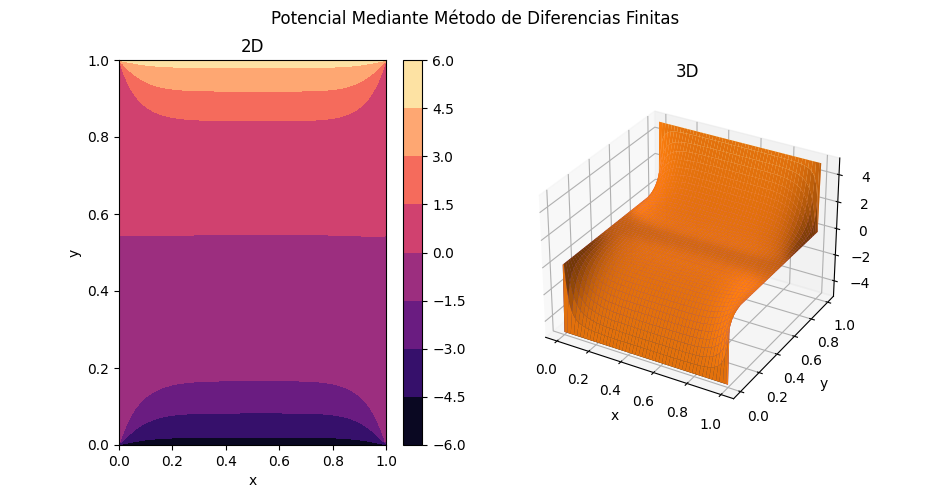

In [127]:
#Gráficamos el potencial resultante en 2D y 3D a partir de lo obtneido en la función anterior.
fig = plt.figure(figsize=(9.5,5))
ax2d = fig.add_subplot(121)
ax3d = fig.add_subplot(122, projection='3d')
X,Y = np.meshgrid(x,y)
fig.suptitle("Potencial Mediante Método de Diferencias Finitas")
c = ax2d.contourf(X,Y,Vm.T, cmap = "magma")
cbar = fig.colorbar(c)
surf = ax3d.plot_surface(X, Y, Vm.T, cmap='magma')
ax2d.set_xlabel("x")
ax2d.set_ylabel("y")
ax2d.set_title("2D")

ax3d.plot_surface(X,Y,Vm.T)
ax3d.set_xlabel("x")
ax3d.set_ylabel("y")
ax3d.set_title("3D")

plt.show()

plt.savefig("figura1.jpg")



In [128]:
#Ahora cálculamos el potencial de forma análitica.
xk = np.linspace(0, 10, 100)
yk = np.linspace(0, 10, 100)
def SolTeo(x, y, V0 = 5):
    a = N*h
    b = M*h
    k = (4*V0/np.pi)
    X,Y = np.meshgrid(x,y)
    Vt = np.zeros_like(X)
    for n in range(1,200,2):
        Vt += ((1 + np.cosh(n*np.pi*b/a))/(np.sinh(n*np.pi*b/a))*np.sinh(n*np.pi*X/a) - np.cosh(n*np.pi*X/a))*np.sin(n*np.pi*Y/a)/n
        
    return (Vt*k)

In [129]:
Vt = SolTeo(x, y, V0 = 5)

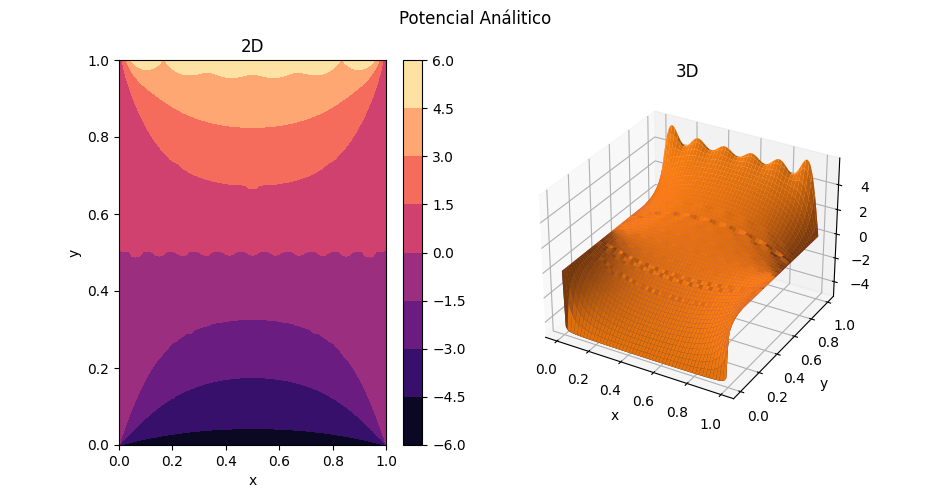

In [130]:
#Gráficamos el potencial resultante en 2D y 3D a partir de la teoría.
fig = plt.figure(figsize=(9.5,5))
ax2d = fig.add_subplot(121)
ax3d = fig.add_subplot(122, projection='3d')
X,Y = np.meshgrid(x,y)
fig.suptitle("Potencial Análitico")
c = ax2d.contourf(X,Y,Vt.T, cmap = "magma")
cbar = fig.colorbar(c)
surf = ax3d.plot_surface(X, Y, Vt.T, cmap='magma')
ax2d.set_xlabel("x")
ax2d.set_ylabel("y")
ax2d.set_title("2D")

ax3d.plot_surface(X,Y,Vt.T)
ax3d.set_xlabel("x")
ax3d.set_ylabel("y")
ax3d.set_title("3D")

plt.show()
plt.savefig("figura2.jpg")

In [131]:
#Cálculamos la diferencia entre el potencial obtenido teóricamente, y el obtenido mediante diferencias finitas
Vd = Vm.T - Vt.T


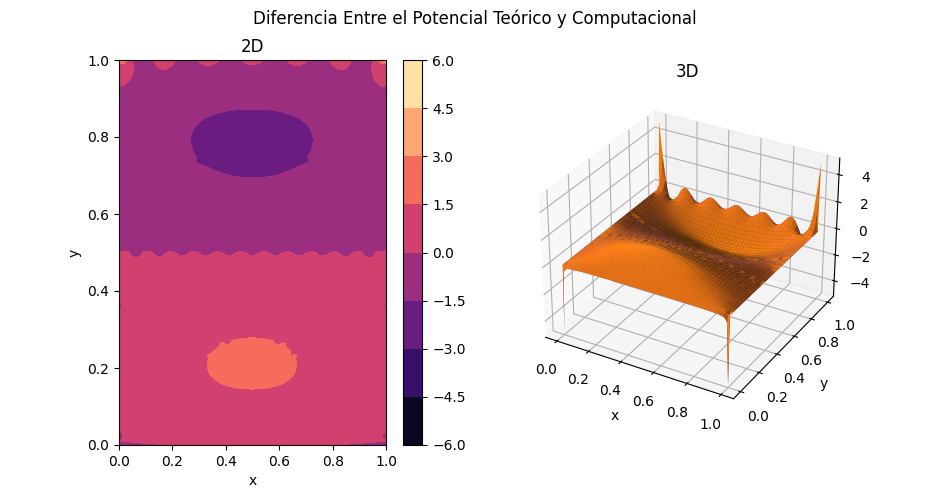

In [132]:
#Gráficamos la diferencia entre el potencial  obtenido teóricamente, y el obtenido mediante diferencias finitas en 2D y 3D a partir de lo obtneido en la función anterior.
fig = plt.figure(figsize=(9.5,5))
ax2d = fig.add_subplot(121)
ax3d = fig.add_subplot(122, projection='3d')
X,Y = np.meshgrid(x,y)
fig.suptitle("Diferencia Entre el Potencial Teórico y Computacional")
c = ax2d.contourf(X,Y,Vd, cmap = "magma")
cbar = fig.colorbar(c)
surf = ax3d.plot_surface(X, Y, Vd, cmap='magma')
ax2d.set_xlabel("x")
ax2d.set_ylabel("y")
ax2d.set_title("2D")

ax3d.plot_surface(X,Y,Vd)
ax3d.set_xlabel("x")
ax3d.set_ylabel("y")
ax3d.set_title("3D")

plt.show()
plt.savefig("figura3.jpg")